# Given

2 datasets - one for Regression task, and another for Classification task

# Find 

Assess multiple model implementation, and identify the best fit,

While doing that:

* split train into train, cross_validation, test - 60%/20%/20%
* create multiple models
    * sklearn linear regression
    * sklearn polynomial regression
    * tensorflow regression
* assess cross validation accuracy
* pick the configuration with the lowest cv loss
* assess accuracy on a test set
* comparison mean squared error for

# Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

2023-10-27 20:25:15.554696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Regression

In [2]:
data = np.loadtxt("./Lab7_RegressionData.csv", delimiter=",")
x = data[:,0]
y = data[:,1]
x.shape, y.shape

((50,), (50,))

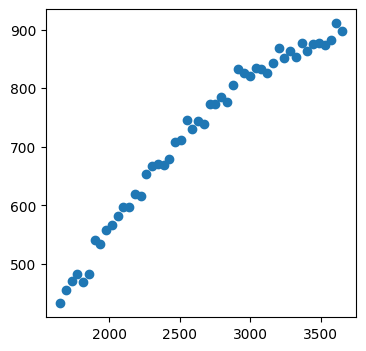

In [3]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x,y)

Split to Train - Test - Validation sets

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42) # 60%/40%
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42) # 40% -> 50%/50%

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((30,), (30,), (10,), (10,), (10,), (10,))

Scale feature

In [5]:
regr_scaler = StandardScaler()
x_train_scaled = regr_scaler.fit_transform(x_train.reshape(-1,1))
x_test_scaled = regr_scaler.fit_transform(x_test.reshape(-1,1))
x_val_scaled = regr_scaler.fit_transform(x_val.reshape(-1,1))

##### SKLearn - Linear Regression

In [6]:
x_train_scaled.shape

(30, 1)